<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.149697,38.381249,88.101651,-1677.683724,-1473.051128,-614.415735,-858.635393
1,0.0,1.0,29.342768,99.468534,20.112487,-3611.523356,-3452.599567,2860.094209,-6312.693776
2,0.0,2.0,42.503857,41.483160,23.978532,-431.724227,-313.758678,1060.958954,-1374.717632
3,0.0,3.0,31.465281,83.102971,42.586063,3503.181966,3670.336281,2101.566658,1568.769623
4,0.0,4.0,90.211622,75.933305,88.037090,1674.157955,1938.339972,-337.255720,2275.595692
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,86.302834,97.683280,41.574523,2861.650146,3097.210783,-1525.045661,4622.256444
59996,999.0,56.0,36.865409,61.120556,28.280607,676.299490,812.566061,1222.668152,-410.102091
59997,999.0,57.0,94.838234,72.786488,61.230321,9175.275254,9414.130297,-1389.099193,10803.229491
59998,999.0,58.0,22.461115,87.551161,29.402359,7442.823501,7592.238136,672.451594,6919.786542


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.149697,38.381249,88.101651,-1677.683724,-1473.051128,-614.415735,-858.635393
1,0.0,1.0,29.342768,99.468534,20.112487,-3611.523356,-3452.599567,2860.094209,-6312.693776
2,0.0,2.0,42.503857,41.483160,23.978532,-431.724227,-313.758678,1060.958954,-1374.717632
3,0.0,3.0,31.465281,83.102971,42.586063,3503.181966,3670.336281,2101.566658,1568.769623
4,0.0,4.0,90.211622,75.933305,88.037090,1674.157955,1938.339972,-337.255720,2275.595692
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,86.302834,97.683280,41.574523,2861.650146,3097.210783,-1525.045661,4622.256444
59996,999.0,56.0,36.865409,61.120556,28.280607,676.299490,812.566061,1222.668152,-410.102091
59997,999.0,57.0,94.838234,72.786488,61.230321,9175.275254,9414.130297,-1389.099193,10803.229491
59998,999.0,58.0,22.461115,87.551161,29.402359,7442.823501,7592.238136,672.451594,6919.786542


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    68.149697  38.381249  ...  -614.415735   -858.635393
      1.0    29.342768  99.468534  ...  2860.094209  -6312.693776
      2.0    42.503857  41.483160  ...  1060.958954  -1374.717632
      3.0    31.465281  83.102971  ...  2101.566658   1568.769623
      4.0    90.211622  75.933305  ...  -337.255720   2275.595692
...                ...        ...  ...          ...           ...
999.0 55.0   86.302834  97.683280  ... -1525.045661   4622.256444
      56.0   36.865409  61.120556  ...  1222.668152   -410.102091
      57.0   94.838234  72.786488  ... -1389.099193  10803.229491
      58.0   22.461115  87.551161  ...   672.451594   6919.786542
      59.0   80.360583  59.254876  ...  -122.098900  -1434.611820

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    68.149697  38.381249  ...  -614.415735   -858.635393
      1.0    29.342768  99.468534  ...  2860.094209  -6312.693776
      2.0    42.503857  41.483160  ...  1060.958954  -1374.717632
      3.0    31.465281  83.102971  ...  2101.566658   1568.769623
      4.0    90.211622  75.933305  ...  -337.255720   2275.595692
...                ...        ...  ...          ...           ...
999.0 55.0   86.302834  97.683280  ... -1525.045661   4622.256444
      56.0   36.865409  61.120556  ...  1222.668152   -410.102091
      57.0   94.838234  72.786488  ... -1389.099193  10803.229491
      58.0   22.461115  87.551161  ...   672.451594   6919.786542
      59.0   80.360583  59.254876  ...  -122.098900  -1434.611820

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.149697,38.381249,88.101651,-1677.683724,-1473.051128,-614.415735,-858.635393
1,0.0,1.0,29.342768,99.468534,20.112487,-3611.523356,-3452.599567,2860.094209,-6312.693776
2,0.0,2.0,42.503857,41.483160,23.978532,-431.724227,-313.758678,1060.958954,-1374.717632
3,0.0,3.0,31.465281,83.102971,42.586063,3503.181966,3670.336281,2101.566658,1568.769623
4,0.0,4.0,90.211622,75.933305,88.037090,1674.157955,1938.339972,-337.255720,2275.595692
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,86.302834,97.683280,41.574523,2861.650146,3097.210783,-1525.045661,4622.256444
59996,999.0,56.0,36.865409,61.120556,28.280607,676.299490,812.566061,1222.668152,-410.102091
59997,999.0,57.0,94.838234,72.786488,61.230321,9175.275254,9414.130297,-1389.099193,10803.229491
59998,999.0,58.0,22.461115,87.551161,29.402359,7442.823501,7592.238136,672.451594,6919.786542


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    68.149697  38.381249  ...  -614.415735   -858.635393
      1.0    29.342768  99.468534  ...  2860.094209  -6312.693776
      2.0    42.503857  41.483160  ...  1060.958954  -1374.717632
      3.0    31.465281  83.102971  ...  2101.566658   1568.769623
      4.0    90.211622  75.933305  ...  -337.255720   2275.595692
...                ...        ...  ...          ...           ...
999.0 55.0   86.302834  97.683280  ... -1525.045661   4622.256444
      56.0   36.865409  61.120556  ...  1222.668152   -410.102091
      57.0   94.838234  72.786488  ... -1389.099193  10803.229491
      58.0   22.461115  87.551161  ...   672.451594   6919.786542
      59.0   80.360583  59.254876  ...  -122.098900  -1434.611820

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

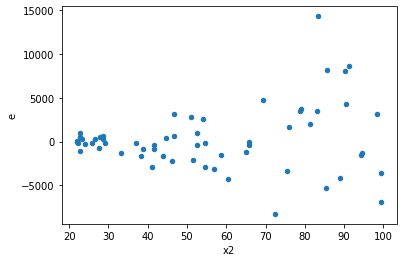

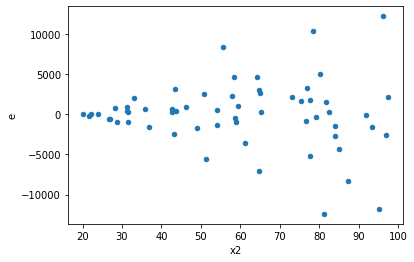

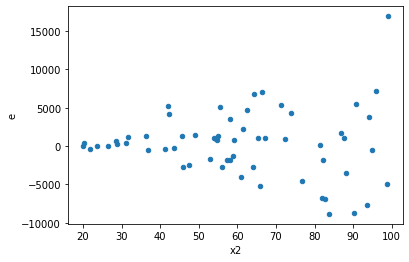

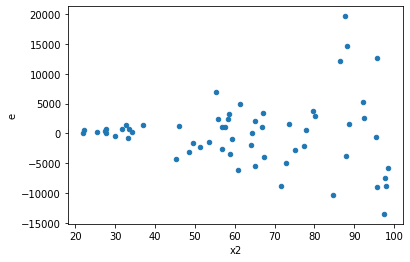

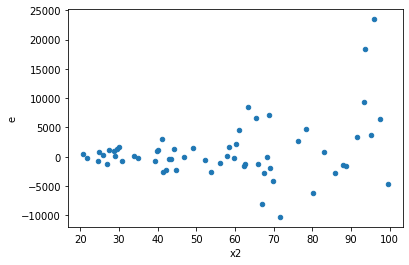

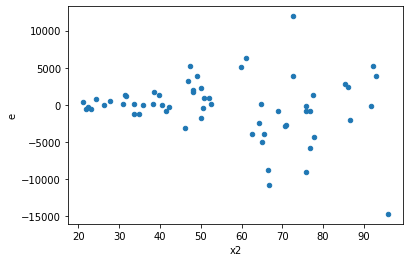

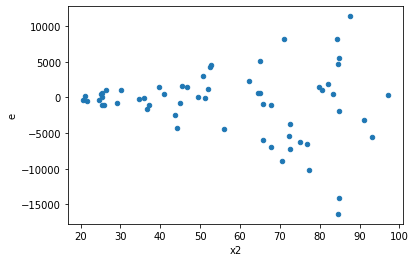

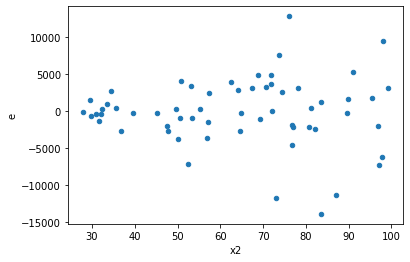

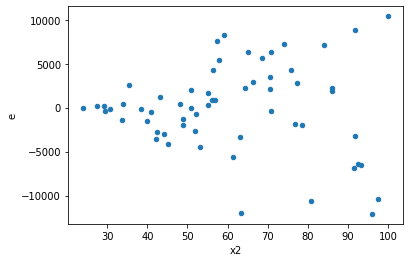

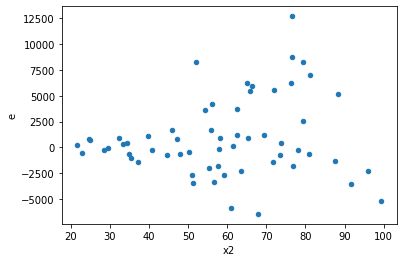

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,635061161.7739451,10571894.050652243,31753058.088697255,528594.7025326121,60.070708118264236,5.551115123125783e-14,0.9999999999999722,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,606005036.7288029,62337897.06445029,30300251.836440146,3116894.8532225145,9.721294192876972,2.364077444694246e-06,0.9999988179612777,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,874885151.4544715,60889138.99052317,43744257.572723575,3044456.949526158,14.368492738756567,7.006659874519983e-08,0.9999999649667006,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1526808679.8343115,105337169.20942627,76340433.99171558,5266858.460471313,14.494491273054663,6.462293433706634e-08,0.9999999676885328,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1128524486.2537296,34404469.30370827,56426224.31268648,1720223.4651854136,32.801682720102065,2.4579005497571416e-11,0.9999999999877105,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,666595211.3359327,50177572.91632461,33329760.566796638,2508878.64581623,13.284724082759785,1.4429760897272104e-07,0.9999999278511955,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,833650102.2243762,38137314.89937131,41682505.11121881,1906865.7449685656,21.859171376486152,1.315882292018955e-09,0.9999999993420589,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,793810079.691794,86594358.93008006,39690503.9845897,4329717.946504002,9.166995281213985,3.93452421998397e-06,0.99999803273789,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,794712825.4603268,67645509.18796526,39735641.27301634,3382275.459398263,11.748197847873003,4.4084335448779655e-07,0.9999997795783228,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,635061161.7739451,10571894.050652243,31753058.088697255,528594.7025326121,60.070708118264236,5.551115123125783e-14,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,606005036.7288029,62337897.06445029,30300251.836440146,3116894.8532225145,9.721294192876972,2.364077444694246e-06,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,874885151.4544715,60889138.99052317,43744257.572723575,3044456.949526158,14.368492738756567,7.006659874519983e-08,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1526808679.8343115,105337169.20942627,76340433.99171558,5266858.460471313,14.494491273054663,6.462293433706634e-08,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1128524486.2537296,34404469.30370827,56426224.31268648,1720223.4651854136,32.801682720102065,2.4579005497571416e-11,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,666595211.3359327,50177572.91632461,33329760.566796638,2508878.64581623,13.284724082759785,1.4429760897272104e-07,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,833650102.2243762,38137314.89937131,41682505.11121881,1906865.7449685656,21.859171376486152,1.315882292018955e-09,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,793810079.691794,86594358.93008006,39690503.9845897,4329717.946504002,9.166995281213985,3.93452421998397e-06,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,794712825.4603268,67645509.18796526,39735641.27301634,3382275.459398263,11.748197847873003,4.4084335448779655e-07,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64